<img src="https://imgur.com/QxwVatL.png" style="float:center;">

Aprendemos sobre a sintaxe de arrays e como isso nos permite usar arrays não apenas para armazenar uma coleção de números, mas também para realizar cálculos com essas coleções. Aqui, exploramos ainda mais como analisar coleções de dados, como arrays.

# <font color=#005757>1. Introdução ao nossos dados </font>

Considere a lista de precipitação total média mensal (para o período de 1991 a 2020) para a Fortaleza - Ceará, de acordo com o  [Instituto Nacional de Meteorologia](https://pt.wikipedia.org/wiki/Predefini%C3%A7%C3%A3o:Tabela_clim%C3%A1tica_de_Fortaleza).

Mês | Precipitação (mm)
----|------------------
Jan.| 156.4
Fev.| 187
Mar.| 336.9
Abr.| 385
Mai.| 229
Jun.| 130
Jul.| 69.7
Ago.| 20
Set.| 13.6
Out.| 9.5
Nov.| 9.8
Dez.| 37.1

Vamos criar um gráfico com esses dados:



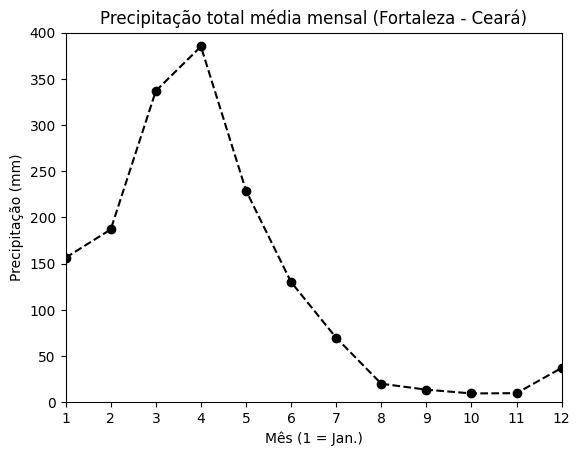

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mes = np.array(range(1, 13))
precipitacao = np.array([156.4, 187, 336.9, 385, 229, 130, 69.7, 20, 13.6, 9.5, 9.8, 37.1])

plt.plot(mes, precipitacao, "ko--")

plt.axis([1, 12, 0, 400])
plt.xticks(range(1, 13))

plt.xlabel("Mês (1 = Jan.)")
plt.ylabel("Precipitação (mm)")
plt.title("Precipitação total média mensal (Fortaleza - Ceará)");

No notebook anterior, fomos apresentados aos fundamentos das arrays: como criar, indexar e fatiar arrays e como fazer cálculos sobre os elementos do array.

Para analisar os dados de precipitação acima, é necessário ampliar esses conceitos de arrays, juntamente com a incorporação de duas novas estruturas de programação - **loops** e **condicionais** - para permitir que o código examine várias partes de dados de maneira contextualizada.

## <font color=#005757>1.1. Uma pequena parada: `range`</font>

Veja que no gráfico usamos `range`para definir um array para os meses. A função é `range` é uma função integrada do Python que gera uma sequência de números dentro de um intervalo especificado. Ele retorna um objeto de intervalo, não uma lista, o que é mais eficiente em termos de memória para intervalos grandes. É extremamente usado dentro de loopings, como iremos ver. Veja por exemplo:

In [ ]:
range(1, 13)

range(1, 13)

In [ ]:
list(range(1, 13))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
np.array(range(1, 13))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
# Ele também aceita passos: valos de 1 a 20 (não incluso) de 2 em 2
list(range(1, 20, 2))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# <font color=#005757>2. Mais sobre criação de arrays</font>

Embora às vezes estejamos interessados em criar arrays a partir de uma lista de valores que digitamos, na maioria das vezes queremos que o computador crie e preencha nossos arrays para nós, com base em alguns requisitos. Se quisermos criar um array de um milhão de elementos, não queremos digitar todos esses valores à mão!

Para criar um array unidimensional com um número dado de elementos, todos preenchidos com zeros, podemos fazer:


In [ ]:
# Por padrão cada elemento é um valor float
cinco_0s = np.zeros(5)
cinco_0s

array([0., 0., 0., 0., 0.])

In [ ]:
# Mas podemos especificar o tipo com dtype
cinco_0s_inteiros = np.zeros(5, dtype = int)
cinco_0s_inteiros

array([0, 0, 0, 0, 0])

Ou se quisermos com uns em vez de zeros?

In [ ]:
cinco_1s = np.ones(5)
cinco_1s

array([1., 1., 1., 1., 1.])

e se quisermos um valor específico em vez de zeros e uns?

In [ ]:
cinco_100s = np.ones(5) * 100
cinco_100s

array([100., 100., 100., 100., 100.])

Um tipo comum de cálculo envolve uma coleção de valores em aumento constante (ou decrescente). Existe uma maneira rápida de criar um array unidimensional de valores em aumento constante? Sim: a função `arange`:

In [ ]:
# cinco valores inteiros
np.arange(5)

array([0, 1, 2, 3, 4])

In [ ]:
# cinco valores float
np.arange(5, dtype = float)

array([0., 1., 2., 3., 4.])

In [ ]:
# cinco valores com passo específico
np.arange(0, 1.1, 0.25)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Observe que o `np.arange` é muito parecido com o `range` do início desse notebook. No entanto, essa função já retorna um array e permite especificar o passo como um número float.

Um dos que mais uso para algo assim é o `linspace`, ele retorna números uniformemente espaçados ao longo de um intervalo especificado:

In [ ]:
# Pense assim: eu quero 10 números e estão uniformemente espaçados entre 1 e 100
np.linspace(1, 100, 10)

array([  1.,  12.,  23.,  34.,  45.,  56.,  67.,  78.,  89., 100.])

# <font color=#005757>3. Mais sobre funções em arrays</font>

[Existem muitas mais funções matemáticas](https://numpy.org/doc/stable/reference/routines.math.html) no NumPy que atuam em arrays do que as vistas no notebook anterior. Por exemplo, a função `cumsum` recebe um array e retorna outro array com a soma acumulada de todos os valores que vieram antes no array e incluindo o elemento atual:

In [ ]:
# Vamos usar os dados do início desse notebook:
precipitacao = np.array([156.4, 187, 336.9, 385, 229, 130, 69.7, 20, 13.6, 9.5, 9.8, 37.1])
soma_acumulada = np.cumsum(precipitacao)
soma_acumulada

array([ 156.4,  343.4,  680.3, 1065.3, 1294.3, 1424.3, 1494. , 1514. ,
       1527.6, 1537.1, 1546.9, 1584. ])

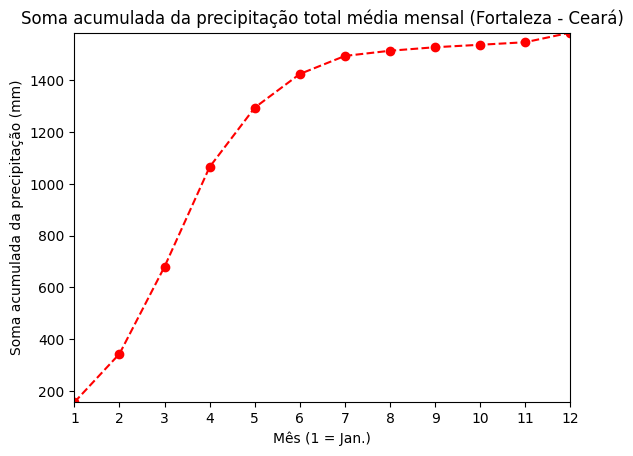

In [ ]:
# Vamos ver isso em um gráfico rapidamente:
plt.plot(mes, soma_acumulada, "ro--")

# Veja que aqui eu usei novamente duas funções do NumPy!
plt.axis([1, 12, np.min(soma_acumulada), np.max(soma_acumulada)])
plt.xticks(range(1, 13))

plt.xlabel("Mês (1 = Jan.)")
plt.ylabel("Soma acumulada da precipitação (mm)")
plt.title("Soma acumulada da precipitação total média mensal (Fortaleza - Ceará)");

# <font color=#005757>4. Introdução aos Loops</font>

Vimos até agora maneiras poderosas de extrair alguns ou todos os elementos em um array e fazer cálculos com eles. No entanto, há momentos em que precisamos de um controle mais refinado em nossos cálculos. Por exemplo, às vezes precisamos escolher certos elementos e fazer cálculos usando esses elementos.




## <font color=#005757>4.1 `for`</font>

Vamos fingir que temos o seguinte array de velocidades (em m/s) e queremos outro array com velocidades em km/h:

In [ ]:
# Nosso array de velocidade:
velocidade_ms = np.array([2.3, 5.4, 12.9, 3.7, 8.8])

# Se quisermos um array com velocidade em km/h em vez de m/s:
velocidade_kmh = velocidade_ms * 3.6
velocidade_kmh

NameError: name 'np' is not defined

Sabemos que arrays aceitam esse tipo de operação (se fosse uma lista, isso não era possível, tente!). Mas podemos refazer essa mesma operação com looping **for**:

In [ ]:
# Primeiro definimos um tipo de array "vazio" do mesmo tamanho:
velocidade_kmh = np.zeros_like(velocidade_ms, dtype = float)

# Para cada indice dentro do range faça:
for indice in range(0, len(velocidade_ms)):
  velocidade_kmh[indice] = velocidade_ms[indice] * 3.6

velocidade_kmh

array([ 8.28, 19.44, 46.44, 13.32, 31.68])

A variável `indice`é chamado de **iterador** e a lista `range(0, len(velocidade_ms))` é chamado de **iterável**. Iteráveis são qualquer tipo de coleção de dados onde a ideia é "avançar para o próximo item". Veja:


In [ ]:
# Vamos usar os dados do início desse notebook:
precipitacao = np.array([156.4, 187, 336.9, 385, 229, 130, 69.7, 20, 13.6, 9.5, 9.8, 37.1])

# Veja como o for está funcionando
for valor in precipitacao:
  print("Elemento {}", valor)

156.4
187.0
336.9
385.0
229.0
130.0
69.7
20.0
13.6
9.5
9.8
37.1


In [ ]:
# Outro exemplo
distancias = [0, 2, 2.5, 4.1, 3.6, 5.1]

# Inicializador
distancia_total = 0

for i in distancias:
  distancia_total += i
  print(distancia_total)

0
2
4.5
8.6
12.2
17.299999999999997


Strings também são iteráveis e podem ser percorridas em um loop, assim como a lista mostrada acima:

In [ ]:
texto = "Introdução à Python na UFC"

for letra in texto:
  print(letra)

I
n
t
r
o
d
u
ç
ã
o
 
à
 
P
y
t
h
o
n
 
n
a
 
U
F
C


## <font color=#005757>4.2. `while` </font>

# <font color=#005757>5. Introdução a estrutura condicional </font>

## <font color=#005757>5.1. Booleanos </font>

## <font color=#005757>5.2. Declaração `if` </font>

O `if`é uma estrutura condicional que faz algum tipo de teste que pode ser avaliado como verdadeiro ou falso, por exemplo, se dois valores são iguais ou se um é maior que o outro. Por exemplo,

In [ ]:
numero_atomico = 6

# Se esse valor for igual a 6 então...
# O símbolo == é o operador que testa se dois valores são iguais
if numero_atomico == 6:
  print("O elemento tem o mesmo número de prótons que o carbono")

O elemento tem o mesmo número de prótons que o carbono


In [ ]:
# Se a variavel numero_atomico for menor que 6 então...
if numero_atomico < 6:
  print("O elemento tem menos prótons que o carbono")

In [ ]:
# Vamos mudar nosso numero atômico:
numero_atomico = 3

if numero_atomico < 6:
    print("O elemento tem menos prótons que o carbono")
if numero_atomico > 6:
    print("O elemento tem mais prótons que o carbono")

O elemento tem menos prótons que o carbono


A Tabela abaixo lista os operadores básicos de comparação que podemos usar na condição de teste para uma instrução `if`. Cada um desses operadores "conecta" dois operandos, então deve haver algo (uma variável ou um valor) à esquerda e à direita do operador:


| Operador       | Código                 |
|----------------|------------------------|
| Igual a        | `==`                   |
| Diferente de   | `!=`                   |
| Maior que      | `>`                    |
| Maior ou igual a  | `>=`                |
| Menor ou igual a  | `<=`                |

Vejamos um exemplo para nossos dados de precipitação. Imagine que queremos saber qual é o mês com maior precipitação:

In [ ]:
# Apenas repetindo os dados aqui para nos lembrarmos:
mes = np.array(range(1, 13))
precipitacao = np.array([156.4, 187, 336.9, 385, 229, 130, 69.7, 20, 13.6, 9.5, 9.8, 37.1])

# Definindo o primeiro elemento de cada variável como maior:
maior_precipitacao = precipitacao[0]
mes_maior_precipitacao = mes[0]

# Para cada elemento dentro do mês:
for i in range(1, len(mes)):
  # Se essa precipitacao for maior que o nosso fixado
  if precipitacao[i] > maior_precipitacao:
    # O fixado será essa esse maior
    maior_precipitacao = precipitacao[i]
    # E o mês também
    mes_maior_precipitacao = mes[i]

print(f"O mês com a maior precipitação é o mês {mes_maior_precipitacao}, com {maior_precipitacao} mm.")

O mês com a maior precipitação é o mês 4, com 385.0 mm.


Bom, você pode está se perguntando se existe alguma forma de fazer isso sem usar nem looping nem alguma estrutura condicional. Podemos usar o próprio NumPy para isso:

In [ ]:
# Encontrando o índice do maior valor na matriz de precipitação
indice_maior_precipitacao = np.argmax(precipitacao)

# Obtendo o valor da maior precipitação
maior_precipitacao = precipitacao[indice_maior_precipitacao]

# Obtendo o mês correspondente ao índice encontrado
mes_maior_precipitacao = mes[indice_maior_precipitacao]

print(f"O mês com a maior precipitação é o mês {mes_maior_precipitacao}, com {maior_precipitacao} mm.")

O mês com a maior precipitação é o mês 4, com 385.0 mm.


## <font color=#005757>5.3. Declaração `if-else` </font>

Como especificamos comandos Python para executar quando a condição `if` é falsa, mas apenas se a condição `if` for falsa? Este é o propósito da instrução `if-else`:

In [ ]:
numero_atomico = 6

# Lembre-se que fizemos isso anteriormente e não aconteceu nada...
if numero_atomico < 6:
  print("O elemento tem menos prótons que o carbono")
else:
  print("O elemento pode ter o número de prótons igual ou maior que o carbono")

O elemento pode ter o número de prótons igual ou maior que o carbono


Uma maneira de entender a instrução `if` como uma instrução `if-else` é a seguinte:


In [ ]:
if numero_atomico < 6:
  print("O elemento tem menos prótons que o carbono")
else:
  pass

O comando `pass` é a maneira de dizer ao interpretador Python "não fazer nada". Quando o comando é executado, nada é feito: não há saída na tela, nenhum cálculo é feito, nada.

## <font color=#005757>5.4. Declaração `if-elif` </font>

Vimos anteriormente como podemos encadear várias instruções if para selecionar uma opção de um conjunto de opções possíveis. No entanto, em tal coleção de instruções, não fica totalmente claro que essas declarações estão todas relacionadas umas com as outras. Python possui outra construção para tornar essa inter-relação mais clara: a instrução `if-elif`:

In [ ]:
numero_atomico = 2

if numero_atomico < 6:
  print("Elemento tem menos prótons que carbono")
elif numero_atomico > 6:
  print("Elemento tem mais prótons que carbono")
elif numero_atomico == 6:
  print("Elemento é carbono")
else:
  print("Número atômico impróprio")

Elemento tem menos prótons que carbono


Como podemos usar loops `for` e uma declaração `if` para calcular a média da precipitação mensal média de verão em Fortaleza (onde o [verão](https://www.falandodeviagem.com.br/viewtopic.php?t=19602) é definido em dezembro, janeiro e fevereiro)?

In [ ]:
# Apenas repetindo os dados aqui para nos lembrarmos:
mes = np.array(range(1, 13))
precipitacao = np.array([156.4, 187, 336.9, 385, 229, 130, 69.7, 20, 13.6, 9.5, 9.8, 37.1])

precipitacao_verao_soma = 0
for i in range(len(mes)):
  # Se o mês for dezembro (12):
  if mes[i] == 12:
    precipitacao_verao_soma += precipitacao[i]
  # Se o mês for janeiro (1):
  elif mes[i] == 1:
    precipitacao_verao_soma += precipitacao[i]
  # Se o mês for fevereiro (2):
  elif mes[i] == 2:
    precipitacao_verao_soma += precipitacao[i]
  else:
    pass

media_verao = precipitacao_verao_soma / 3
print(media_verao)

126.83333333333333


## <font color=#005757>5.5. Aninhando senteças `if` e `if-else` </font>

# <font color=#005757>6. Exercícios (colocar exercícios do cap8) </font>


## <font color=#005757>6.1 Um Sistema Massa-Mola</font>

Considere o seguinte sistema massa-mola com uma constante de mola $k$ e uma massa $m$:

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Horizontal-mass-on-spring.svg/640px-Horizontal-mass-on-spring.svg.png" width="330"/>
</div>

Assumindo a ausência de gravidade e que a massa só pode se mover na direção positiva ou negativa de $x$, a solução para o deslocamento $x$ é:

$$ x = A \cos(\omega t + \phi)$$

onde $A$ é a amplitude da oscilação, $t$ é o tempo, $\phi$ é o ângulo de fase, e a frequência angular $\omega$ é dada por:

$$\omega = \sqrt{\frac{k}{m}}$$

Se $A = 0.05 \, \text{m}$, $k = 2 \, \text{N/m}$, $m = 1 \, \text{kg}$, e $\phi = 0 \, \text{rad}$ (o que significa que $x = A$ em $t = 0 \, \text{s}$), crie um array e preencha-o com os valores de $x$ para os primeiros 8 s, tirados a cada 0.1 s. Plote este array de valores de deslocamento $x$ versus os elementos correspondentes no array de valores de tempo $t$.

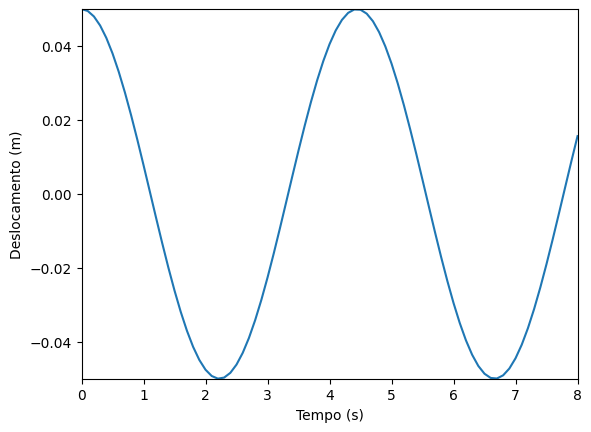

In [ ]:
# Extra: você conseguiria fazer isso dentro de uma função?

## <font color=#005757>6.2 Gás ideal</font>

Supondo que façamos uma série de medições em um gás que podemos tratar como um gás ideal e obtenhamos os seguintes valores de pressão nos seguintes tempos:

Tempo (s) | Pressão (Pa)
----------|-------------
0.0       | 102000
1.0       | 134000
2.0       | 143100
3.0       | 122050
4.0       | 114180
5.0       | 103060

Um gás ideal é aquele que segue a relação:

$$ PV = nRT $$

onde $P$ é a pressão do gás (em Pa), $V$ é o volume (em $\text{m}^3$), $n$ é o número de mol do gás, $R$ a constante do gás $(R = 8.31441 \, \text{J K}^{-1} \, \text{mol}^{-1})$, e $T$ a temperatura (em K).

Se o volume do gás é 0.5 $\text{m}^3$ e há 25 mol do gás, qual é a temperatura do gás? Embora isso possa ser resolvido usando NumPy (consegue provar?), tente resolver isso usando um loop `for`. Também faça um gráfico da temperatura do gás versus o tempo.

array([245.35715703, 322.3319514 , 344.22165854, 293.58667663,
       274.65568814, 247.9069471 ])

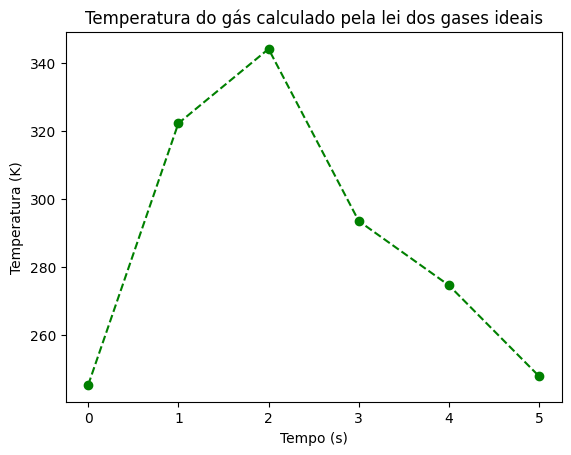

## <font color=#005757>6.3 Calculando desvios da precipitação</font>

Para os dados de média mensal total de precipitação de Fortaleza, calcule os desvios de cada média mensal total em relação à média do período da precipitação. Imprima os meses em que os valores mensais totais de precipitação estão acima da média do período. Dica: A média do período é a média dos valores médios mensais totais de precipitação para o período em questão (1991 a 2020). Use loops for para fazer os cálculos.

Valor de precipitação 156.4 está acima da média do período no mês 1
Valor de precipitação 187.0 está acima da média do período no mês 2
Valor de precipitação 336.9 está acima da média do período no mês 3
Valor de precipitação 385.0 está acima da média do período no mês 4
Valor de precipitação 229.0 está acima da média do período no mês 5

 Média do período (1991 a 2020) 131.99999999999997
